In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


In [4]:
# Load the dataset
dataset = pd.read_csv("./datasets/Social_Network_Ads.csv")

# Check the first few records
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [36]:
# Split into features and labels
X = dataset.iloc[:, 2:-1].values  # Age and EstimatedSalary
Y = dataset.iloc[:, -1].values  # Purchased (0 or 1)

# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [37]:
# Train the KNN model
classifier = KNeighborsClassifier(n_neighbors=5)  # You can experiment with different K values
classifier.fit(X_train, Y_train)

KNeighborsClassifier()

In [38]:
# Make predictions
Y_pred = classifier.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(Y_test, Y_pred)

# Accuracy, Precision, Recall, and F1 Score
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)

# Print results
print("Confusion Matrix:\n", cm)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Confusion Matrix:
 [[59  4]
 [ 3 34]]
Accuracy: 0.93
Precision: 0.8947368421052632
Recall: 0.918918918918919
F1 Score: 0.9066666666666666


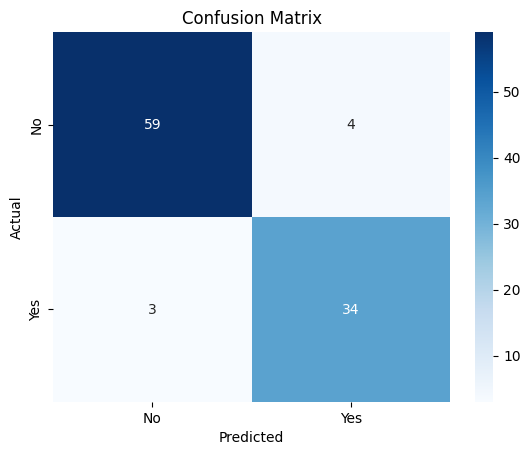

In [39]:
import seaborn as sns

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [40]:
# Creating Age and Salary Groups
dataset['Age_Group'] = pd.cut(dataset['Age'], bins=[18, 25, 35, 45, 60], labels=['18-25', '26-35', '36-45', '46-60'])
dataset['Salary_Group'] = pd.cut(dataset['EstimatedSalary'], bins=[0, 30000, 60000, 90000, 120000], labels=['0-30K', '30K-60K', '60K-90K', '90K-120K'])


In [41]:
# Predict for the whole dataset
dataset['Purchase_Prediction'] = classifier.predict(scaler.transform(dataset[['Age', 'EstimatedSalary']]))

# Calculate the percentage of purchases in each age and salary group
purchase_by_age_salary = dataset.groupby(['Age_Group', 'Salary_Group'])['Purchase_Prediction'].mean().reset_index()

# Filter the groups where the purchase prediction is higher than 50% (assuming "1" means purchase)
purchase_by_age_salary[purchase_by_age_salary['Purchase_Prediction'] > 0.5]


,Age_Group,Salary_Group,Purchase_Prediction
7,26-35,90K-120K,0.600000
8,36-45,0-30K,0.750000
11,36-45,90K-120K,1.000000
12,46-60,0-30K,1.000000
13,46-60,30K-60K,1.000000
14,46-60,60K-90K,0.761905
15,46-60,90K-120K,1.000000
